<font size = 8 color ='336EFF'>Regularization</font>


## *Equipo 4*:
| <h4>Alumno</h4> | <h4>Matricula</h4> |
| ---|---|
| <h5>Mauricio Juárez Sánchez</h5> | <h5>A01660336</h5> |
| <h5>Alfredo Jeong Hyun Park</h5> | <h5>A01658259</h5> |
| <h5>Fernando Alfonso Arana Salas</h5> | <h5>A01272933</h5> |
| <h5>Miguel Ángel Bustamante Pérez</h5> | <h5>A01781583</h5> |

<div class="alert alert-block alert-info">

**Import Libraries** 
</div>

In [82]:
# your code
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

<div class="alert alert-block alert-info">

**Load the MNIST digits dataset** 
</div>

In [36]:
# your code
digital_dataset = tf.keras.datasets.mnist
train, test = digital_dataset.load_data(path="mnist.npz")

In [37]:
X_train = train[0]
y_train = train[1]
X_test = test[0]
y_test = test[1]

<div class="alert alert-block alert-info">

**Plot example of the data set** 
</div>

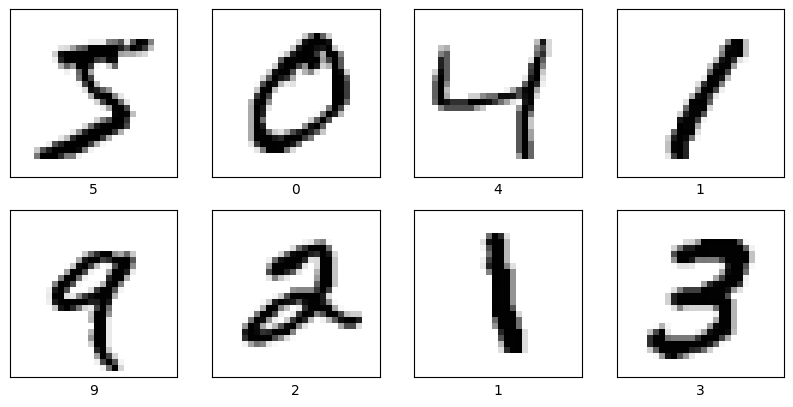

In [39]:
# your code
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def plot_images(images, labels, class_names, num_images=8):
     plt.figure(figsize=(10, 10))
     for i in range(num_images):
          plt.subplot(4, 4, i + 1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(X_train[i], cmap=plt.cm.binary)
          plt.xlabel(class_names[labels[i]])
     plt.show()

plot_images(X_train, y_train, class_names)

<div class="alert alert-block alert-info">

**Reshape the images** 
</div>

In [43]:
# your code
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)

<div class="alert alert-block alert-info">

**Convert to categorical** 
</div>

Convert to categorical using to_categorial function
what is to_categorical doing here ?

to_categorical() recieves 2 parameters:
1. array of labels
2. number of labels/classes

For example: 
```array([5, 0, 1, 3, ... 9])```

It returns One-Hot encoded array for each label:

```
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])
```

In [51]:
# your code
from tensorflow.keras.utils import to_categorical

num_classes = 10

y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

<div class="alert alert-block alert-info">

**Create the model without dropout** 

`10->256->512->#number of classes`
</div>

In [61]:
# your code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

def build_model(activation):
     model = Sequential([
          # Input layer
          Dense(10, activation=activation, input_shape=(784,), kernel_regularizer=l2(0.01)),
          # Hidden Layer 1
          Dense(256, activation, kernel_regularizer=l2(0.01)),
          # Hidden Layer 2
          Dense(512, activation, kernel_regularizer=l2(0.01)),
          # Output layer with Softmax activation
          Dense(10, activation='softmax')
     ])
     return model

In [62]:
# Create models with ReLU and Tanh activations
model_relu = build_model('relu')
model_tanh = build_model('tanh')

In [63]:
# Compile the models
def compile_model(model):
     model.compile(
          loss='categorical_crossentropy',
          # optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
          optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001),
          metrics=['accuracy']
     )

In [64]:
compile_model(model_tanh)
compile_model(model_relu)

<div class="alert alert-block alert-info">

**Visualize the models** 
</div>

In [65]:
# your code
model_tanh.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 256)               2816      
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 147380 (575.70 KB)
Trainable params: 147380 (575.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 256)               2816      
                                                                 
 dense_8 (Dense)             (None, 512)               131584    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 147380 (575.70 KB)
Trainable params: 147380 (575.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<div class="alert alert-block alert-info">

**Fit the models** 
1. 20 Epochs
2. Batch size = 32
- use the validation dataset created before
</div>

In [67]:
# your code
epochs = 20
batch_size = 32

Epoch 1/32
2400/2400 - 3s - loss: 4.6286 - accuracy: 0.6884 - val_loss: 4.0209 - val_accuracy: 0.8326 - 3s/epoch - 1ms/step
Epoch 2/32
2400/2400 - 2s - loss: 3.7320 - accuracy: 0.8661 - val_loss: 3.4930 - val_accuracy: 0.8894 - 2s/epoch - 991us/step
Epoch 3/32
2400/2400 - 2s - loss: 3.3329 - accuracy: 0.8918 - val_loss: 3.1533 - val_accuracy: 0.9041 - 2s/epoch - 990us/step
Epoch 4/32
2400/2400 - 2s - loss: 3.0113 - accuracy: 0.9040 - val_loss: 2.8534 - val_accuracy: 0.9143 - 2s/epoch - 994us/step
Epoch 5/32
2400/2400 - 2s - loss: 2.7327 - accuracy: 0.9129 - val_loss: 2.6049 - val_accuracy: 0.9191 - 2s/epoch - 1ms/step
Epoch 6/32
2400/2400 - 2s - loss: 2.4884 - accuracy: 0.9189 - val_loss: 2.3932 - val_accuracy: 0.9172 - 2s/epoch - 988us/step
Epoch 7/32
2400/2400 - 2s - loss: 2.2660 - accuracy: 0.9250 - val_loss: 2.1675 - val_accuracy: 0.9284 - 2s/epoch - 1ms/step
Epoch 8/32
2400/2400 - 2s - loss: 2.0698 - accuracy: 0.9305 - val_loss: 1.9895 - val_accuracy: 0.9293 - 2s/epoch - 1ms/step


In [ ]:
history_relu = model_relu.fit(X_train_flat,
                              y_train_categorical,
                              epochs,
                              batch_size,
                              validation_split=0.2,
                              verbose=2)

In [72]:
history_tanh = model_tanh.fit(X_train_flat,
                              y_train_categorical,
                              epochs,
                              batch_size,
                              validation_split=0.2,
                              verbose=2)

Epoch 1/32
2400/2400 - 3s - loss: 5.1304 - accuracy: 0.5423 - val_loss: 4.4566 - val_accuracy: 0.7260 - 3s/epoch - 1ms/step
Epoch 2/32
2400/2400 - 3s - loss: 4.2335 - accuracy: 0.7340 - val_loss: 3.9471 - val_accuracy: 0.7902 - 3s/epoch - 1ms/step
Epoch 3/32
2400/2400 - 3s - loss: 3.8311 - accuracy: 0.7747 - val_loss: 3.6426 - val_accuracy: 0.7829 - 3s/epoch - 1ms/step
Epoch 4/32
2400/2400 - 3s - loss: 3.4965 - accuracy: 0.8043 - val_loss: 3.3509 - val_accuracy: 0.8201 - 3s/epoch - 1ms/step
Epoch 5/32
2400/2400 - 3s - loss: 3.2643 - accuracy: 0.7982 - val_loss: 3.1206 - val_accuracy: 0.8106 - 3s/epoch - 1ms/step
Epoch 6/32
2400/2400 - 3s - loss: 3.0243 - accuracy: 0.8102 - val_loss: 2.8435 - val_accuracy: 0.8440 - 3s/epoch - 1ms/step
Epoch 7/32
2400/2400 - 3s - loss: 2.8083 - accuracy: 0.8176 - val_loss: 2.6508 - val_accuracy: 0.8455 - 3s/epoch - 1ms/step
Epoch 8/32
2400/2400 - 3s - loss: 2.5988 - accuracy: 0.8306 - val_loss: 2.4591 - val_accuracy: 0.8526 - 3s/epoch - 1ms/step
Epoch 9/

<div class="alert alert-block alert-info">

**Predict your test dataset and obtain confusion matrix and classification report** 
</div>

In [69]:
# your code
predictions_relu = model_relu.predict(X_test_flat)

313/313 [==============================] - 0s 566us/step


In [73]:
predictions_tanh = model_tanh.predict(X_test_flat)

313/313 [==============================] - 0s 803us/step


Argmax using axis equal to 1

```Convert predictions to class labels (argmax)```

In [70]:
predicted_labels_relu = predictions_relu.argmax(axis=1)

In [74]:
predicted_labels_tanh = predictions_tanh.argmax(axis=1)

<div class="alert alert-block alert-info">

**Confusion matrix and classification report** 
</div>

In [75]:
# your code
from sklearn.metrics import accuracy_score

true_labels = y_test

accuracy_relu = accuracy_score(true_labels, predicted_labels_relu)
accuracy_tanh = accuracy_score(true_labels, predicted_labels_tanh)

print(f"Accuracy for ReLU model: {accuracy_relu:.4f}")
print(f"Accuracy for Tanh model: {accuracy_tanh:.4f}")

Accuracy for ReLU model: 0.9511
Accuracy for Tanh model: 0.8480


In [76]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_relu = confusion_matrix(true_labels, predicted_labels_relu)
confusion_matrix_tanh = confusion_matrix(true_labels, predicted_labels_tanh)
print("Confusion Matrix for ReLU Model:")
print(confusion_matrix_relu)
print("\nConfusion Matrix for Tanh Model:")
print(confusion_matrix_tanh)

Confusion Matrix for ReLU Model:
[[ 952    0    2    0    1   10    8    4    2    1]
 [   0 1123    2    1    0    1    4    0    4    0]
 [   8    3  964   11    8    3    9    7   18    1]
 [   1    6   12  926    0   23    3    9   20   10]
 [   1    4    3    0  932    5    8    1    1   27]
 [   6    1    2   11    1  842    9    0   15    5]
 [   7    2    2    1    5    7  929    0    5    0]
 [   3    8   11    2    0    0    1  984    3   16]
 [   2    0    2   10    2   24    8    3  915    8]
 [   6    3    1    6   16   19    1    6    7  944]]

Confusion Matrix for Tanh Model:
[[ 947    0    0    4    1   12    9    5    2    0]
 [   0 1103    4    5    2    5    4    1   11    0]
 [  79   13  728   90   17    3   57    8   30    7]
 [  47    3    6  865    1   46    3    9   22    8]
 [  11    2    2    0  864    3   43    1    5   51]
 [  60    3    2   32   21  704   31    3   33    3]
 [  61    2    1    2   20   21  844    0    6    1]
 [  11   18   19   22   11    8

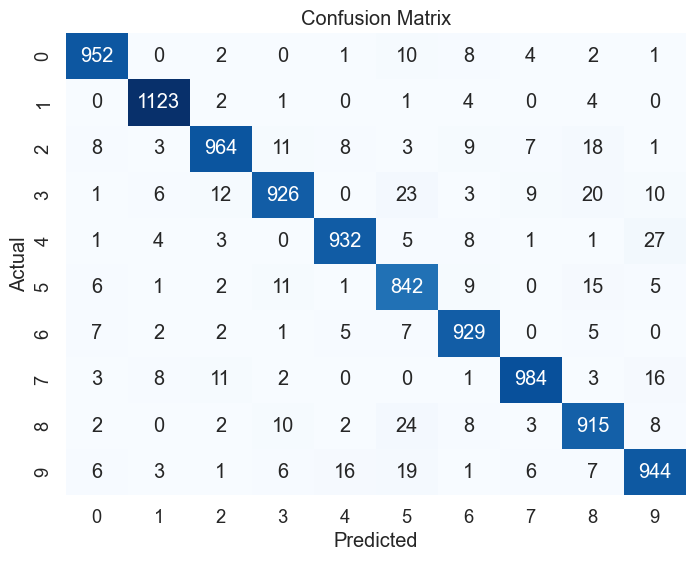

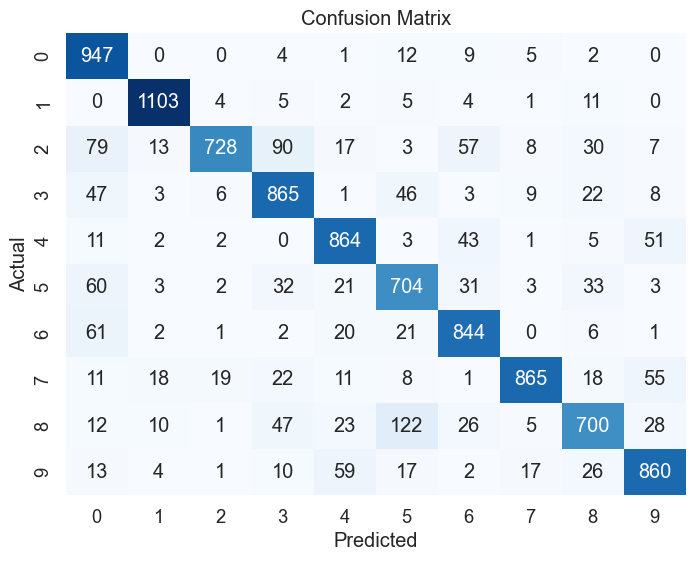

In [77]:
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(confusion_matrix_relu, class_names)
plot_confusion_matrix(confusion_matrix_tanh, class_names)


In [78]:
classification_report_relu = classification_report(true_labels, predicted_labels_relu, target_names=class_names)
classification_report_tanh = classification_report(true_labels, predicted_labels_tanh, target_names=class_names)
print("\nClassification Report for ReLU Model:")
print(classification_report_relu)


Classification Report for ReLU Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.96      0.92      0.94      1010
           4       0.97      0.95      0.96       982
           5       0.90      0.94      0.92       892
           6       0.95      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.92      0.94      0.93       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000


Classification Report for Tanh Model:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       980
           1       0.95      0.97      0.96      1135


In [79]:
print("\nClassification Report for Tanh Model:")
print(classification_report_tanh)


Classification Report for Tanh Model:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       980
           1       0.95      0.97      0.96      1135
           2       0.95      0.71      0.81      1032
           3       0.80      0.86      0.83      1010
           4       0.85      0.88      0.86       982
           5       0.75      0.79      0.77       892
           6       0.83      0.88      0.85       958
           7       0.95      0.84      0.89      1028
           8       0.82      0.72      0.77       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.85     10000



# New model with dropout

<div class="alert alert-block alert-info">

**Create the model with dropout** 

**10->256->512->#number of classes** 
</div>

In [83]:
# your code
dropout_rate = 0.2

def build_model_2(activation):
     model = Sequential([
          # Input layer
          Dense(10, activation=activation, input_shape=(784,), kernel_regularizer=l2(0.01)),
          Dropout(dropout_rate),

          # Hidden Layer 1
          Dense(256, activation, kernel_regularizer=l2(0.01)),
          Dropout(dropout_rate),

          # Hidden Layer 2
          Dense(512, activation, kernel_regularizer=l2(0.01)),
          Dropout(dropout_rate),
          
          # Output layer with Softmax activation
          Dense(10, activation='softmax')
     ])
     return model

<div class="alert alert-block alert-info">

**Fit the models** 
1. 20 Epochs
2. Batch size = 32
- use the validation dataset created before
</div>

In [84]:
# your code
model_relu_2 = build_model_2('relu')
model_tanh_2 = build_model_2('tanh')

In [85]:
def compile_model(model):
     model.compile(
          loss='categorical_crossentropy',
          # optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
          optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001),
          metrics=['accuracy']
     )

In [86]:
compile_model(model_tanh_2)
compile_model(model_relu_2)

In [87]:
# your code
model_tanh_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_20 (Dense)            (None, 256)               2816      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 10)               

In [88]:
model_relu_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_16 (Dense)            (None, 256)               2816      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 10)               

In [89]:
# your code
epochs = 20
batch_size = 32

In [90]:
history_relu_2 = model_relu_2.fit(X_train_flat,
                              y_train_categorical,
                              epochs,
                              batch_size,
                              validation_split=0.2,
                              verbose=2)

Epoch 1/32
2400/2400 - 3s - loss: 5.7510 - accuracy: 0.1883 - val_loss: 5.3897 - val_accuracy: 0.2646 - 3s/epoch - 1ms/step
Epoch 2/32
2400/2400 - 3s - loss: 5.1868 - accuracy: 0.2748 - val_loss: 4.9010 - val_accuracy: 0.3256 - 3s/epoch - 1ms/step
Epoch 3/32
2400/2400 - 3s - loss: 4.7857 - accuracy: 0.3107 - val_loss: 4.5062 - val_accuracy: 0.3579 - 3s/epoch - 1ms/step
Epoch 4/32
2400/2400 - 3s - loss: 4.4566 - accuracy: 0.3245 - val_loss: 4.2258 - val_accuracy: 0.3583 - 3s/epoch - 1ms/step
Epoch 5/32
2400/2400 - 3s - loss: 4.1586 - accuracy: 0.3397 - val_loss: 3.8318 - val_accuracy: 0.4221 - 3s/epoch - 1ms/step
Epoch 6/32
2400/2400 - 3s - loss: 3.8290 - accuracy: 0.3582 - val_loss: 3.5241 - val_accuracy: 0.4266 - 3s/epoch - 1ms/step
Epoch 7/32
2400/2400 - 3s - loss: 3.4427 - accuracy: 0.4360 - val_loss: 3.1003 - val_accuracy: 0.5388 - 3s/epoch - 1ms/step
Epoch 8/32
2400/2400 - 3s - loss: 3.1762 - accuracy: 0.4719 - val_loss: 2.8108 - val_accuracy: 0.6397 - 3s/epoch - 1ms/step
Epoch 9/

In [91]:
history_tanh_2 = model_tanh_2.fit(X_train_flat,
                              y_train_categorical,
                              epochs,
                              batch_size,
                              validation_split=0.2,
                              verbose=2)

Epoch 1/32
2400/2400 - 3s - loss: 5.3423 - accuracy: 0.4293 - val_loss: 4.6054 - val_accuracy: 0.6767 - 3s/epoch - 1ms/step
Epoch 2/32
2400/2400 - 3s - loss: 4.5214 - accuracy: 0.6117 - val_loss: 4.0984 - val_accuracy: 0.7302 - 3s/epoch - 1ms/step
Epoch 3/32
2400/2400 - 3s - loss: 4.0886 - accuracy: 0.6727 - val_loss: 3.7245 - val_accuracy: 0.7781 - 3s/epoch - 1ms/step
Epoch 4/32
2400/2400 - 3s - loss: 3.7533 - accuracy: 0.6991 - val_loss: 3.3726 - val_accuracy: 0.8164 - 3s/epoch - 1ms/step
Epoch 5/32
2400/2400 - 4s - loss: 3.4842 - accuracy: 0.7126 - val_loss: 3.1704 - val_accuracy: 0.8002 - 4s/epoch - 1ms/step
Epoch 6/32
2400/2400 - 3s - loss: 3.2327 - accuracy: 0.7300 - val_loss: 2.9378 - val_accuracy: 0.8092 - 3s/epoch - 1ms/step
Epoch 7/32
2400/2400 - 3s - loss: 3.0240 - accuracy: 0.7345 - val_loss: 2.7423 - val_accuracy: 0.8301 - 3s/epoch - 1ms/step
Epoch 8/32
2400/2400 - 3s - loss: 2.8613 - accuracy: 0.7241 - val_loss: 2.5654 - val_accuracy: 0.8239 - 3s/epoch - 1ms/step
Epoch 9/

In [92]:
# your code
predictions_relu_2 = model_relu_2.predict(X_test_flat)
predictions_tanh_2 = model_tanh_2.predict(X_test_flat)

313/313 [==============================] - 0s 532us/step


In [93]:
# your code
predicted_labels_relu_2 = predictions_relu_2.argmax(axis=1)
predicted_labels_tanh_2 = predictions_tanh_2.argmax(axis=1)

<div class="alert alert-block alert-info">

**Predict your test dataset and obtain confusion matrix and classification report** 
</div>

In [94]:
true_labels = y_test

accuracy_relu_2 = accuracy_score(true_labels, predicted_labels_relu_2)
accuracy_tanh_2 = accuracy_score(true_labels, predicted_labels_tanh_2)

print(f"Accuracy for ReLU model: {accuracy_relu_2:.4f}")
print(f"Accuracy for Tanh model: {accuracy_tanh_2:.4f}")

Accuracy for ReLU model: 0.9098
Accuracy for Tanh model: 0.8513


In [95]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_relu_2 = confusion_matrix(true_labels, predicted_labels_relu_2)
confusion_matrix_tanh_2 = confusion_matrix(true_labels, predicted_labels_tanh_2)
print("Confusion Matrix for ReLU Model:")
print(confusion_matrix_relu_2)
print("\nConfusion Matrix for Tanh Model:")
print(confusion_matrix_tanh_2)

Confusion Matrix for ReLU Model:
[[ 948    0    2    0    0    8   10    9    3    0]
 [   0 1114    3    3    0    1    3    3    7    1]
 [   5    4  926   17    6    4   29   23   13    5]
 [   0    1   37  891    0   49    4   18    6    4]
 [   1    0    4    0  893    0   18    1    2   63]
 [  13    1    8   49    8  752   15    4   34    8]
 [  17    3   17    0    9   11  896    0    5    0]
 [   2    7   18    2    3    0    0  957    2   37]
 [   7   10   25   38   12   67    8   12  787    8]
 [   3    2    2   10   18   17    1   21    1  934]]

Confusion Matrix for Tanh Model:
[[ 912    0    5    5    7   29    7    4    8    3]
 [   0 1101    2    5    0    0    4    1   21    1]
 [  22   22  800   27   33   10   31   13   71    3]
 [  11    7   53  800    3   65    2    7   57    5]
 [   0    2    2    0  908    0   23    0    3   44]
 [  15    2   12   53   30  703   20    6   38   13]
 [  23    6   12    0   12   13  876    1   14    1]
 [   7   18   16    4   15    2

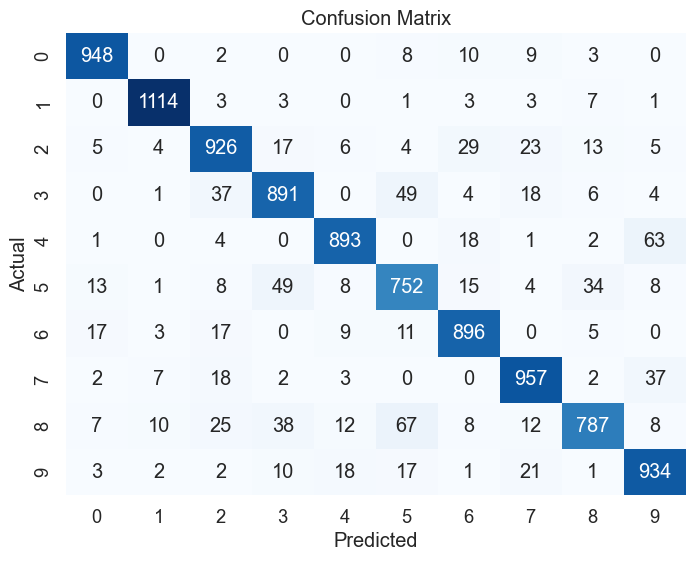

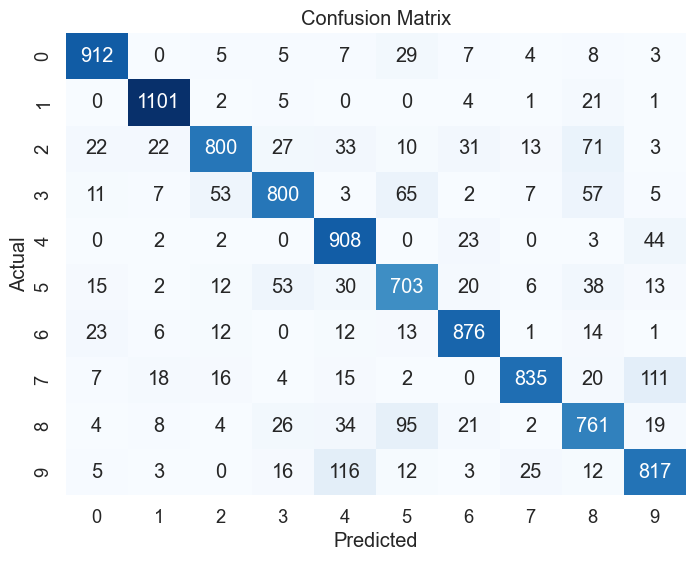

In [96]:
plot_confusion_matrix(confusion_matrix_relu_2, class_names)
plot_confusion_matrix(confusion_matrix_tanh_2, class_names)

In [97]:
classification_report_relu_2 = classification_report(true_labels, predicted_labels_relu_2, target_names=class_names)
classification_report_tanh_2 = classification_report(true_labels, predicted_labels_tanh_2, target_names=class_names)
print("\nClassification Report for ReLU Model:")
print(classification_report_relu)
print("\nClassification Report for Tanh Model:")
print(classification_report_tanh)


Classification Report for ReLU Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.96      0.92      0.94      1010
           4       0.97      0.95      0.96       982
           5       0.90      0.94      0.92       892
           6       0.95      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.92      0.94      0.93       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000


Classification Report for Tanh Model:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       980
           1       0.95      0.97      0.96      1135


<div class="alert alert-block alert-info">

**CONCLUSIONES:** 

Realizamos 2 modelos de redes neuronales diseñados para predecir números del conjunto de datos MNIST, pero difieren en su arquitectura.
</div>

<div class="alert alert-block alert-success">

**Arquitectura del Modelo 1**

- Capas Ocultas: El Modelo 1 tiene dos capas ocultas con 256 y 512 neuronas respectivamente.
- Regularización: Se aplica regularización L2 con un factor de penalización de 0.01 en todas las capas.
- Funciones de Activación: Se experimentó con las funciones de activación ReLU y Tangente Hiperbólica (Tanh).
- Precisión (Accuracy): Para ReLU, se obtuvo una precisión de aproximadamente 95.11%, mientras que para Tanh, la precisión fue de aproximadamente 84.80%.

**Arquitectura del Modelo 2 (con Dropout)**

- Capas Ocultas: Similar al Modelo 1, tiene dos capas ocultas con 256 y 512 neuronas respectivamente.
- Regularización: Se utiliza regularización L2 en todas las capas con un factor de penalización de 0.01.
- Dropout: Se aplica Dropout con una tasa de abandono (dropout_rate) en todas las capas ocultas para evitar el sobreajuste.
- Funciones de Activación: Se usan las mismas funciones de activación (ReLU y Tanh) que en el Modelo 1.
- Precisión (Accuracy): Para ReLU, se obtuvo una precisión de aproximadamente 90.98%, mientras que para Tanh, la precisión fue de aproximadamente 85.13%.
Observaciones:

</div>

<div class="alert alert-warning">

**Regularización L2**

- Ambos modelos utilizan regularización L2 para evitar el sobreajuste. La regularización L2 penaliza los pesos grandes, lo que puede ayudar a mejorar la generalización del modelo.

</div>

<div class="alert alert-warning">

**Dropout**

- El Modelo 2 incorpora Dropout, una técnica de regularización que reduce el sobreajuste al aleatoriamente desactivar un cierto porcentaje de las neuronas durante el entrenamiento. Esto puede ser útil cuando se tienen redes profundas para mejorar la capacidad de generalización.

</div>

<div class="alert alert-warning">

**Funciones de Activación**

- El uso de ReLU en las capas ocultas es común y generalmente se desempeña bien en muchas situaciones.
- La función de activación Tanh también se probó, aunque su rendimiento fue inferior al de ReLU en estos modelos específicos.

</div>

<div class="alert alert-danger">

**Conclusiones Finales**

- Modelo 1 vs. Modelo 2: El Modelo 1, que carece de Dropout, supera al Modelo 2 en términos de precisión para ambas funciones de activación (ReLU y Tanh). Esto sugiere que para este conjunto de datos y arquitectura específica, la inclusión de Dropout no mejoró el rendimiento del modelo.

- Elección de Función de Activación: Para estos modelos y este conjunto de datos, ReLU supera a Tanh en términos de precisión. ReLU tiende a ser más efectiva en las redes neuronales profundas debido a su naturaleza no saturante, lo que ayuda a mitigar el problema del desvanecimiento del gradiente.

- Ajuste y Experimentación: A pesar de los resultados actuales, es importante recordar que los modelos de redes neuronales pueden ser altamente sensibles a los hiperparámetros y a la arquitectura. Experimentar con diferentes arquitecturas, funciones de activación y técnicas de regularización es fundamental para determinar la configuración óptima para un problema específico.

</div>